# DETECTION OF FIRE USING SURVEILLANCE CAMERA FOOTAGE

## Problem Statement:
Develop an intelligent system capable of accurately detecting instances of fire in surveillance camera footage. The primary goal of this project is to create a robust and reliable fire detection model using Convolutional Neural Networks (CNNs) that can assist in early fire detection, thereby preventing potential disasters and providing quick  responses.

### Reason for Choosing the Project:

This project was chosen to address the critical need for advanced fire detection solutions using modern technologies like Convolutional Neural Networks (CNNs). Traditional fire detection methods often rely on human observation and can lead to delayed responses, potentially resulting in severe damages and loss of life. By harnessing the power of CNNs, this project aims to create an intelligent system capable of detecting fires in surveillance camera footage accurately and rapidly. By choosing this project, we strive to contribute to public safety by preventing disasters through early fire detection and enabling timely emergency responses.

## Introduction:
The "Detection of Fire Using Surveillance Camera Footage" project aims to develop an automated solution for timely fire detection in various environments. By harnessing the power of Convolutional Neural Networks (CNNs), this project seeks to create a robust system capable of analyzing surveillance camera footage and accurately identifying instances of fire. This technology holds the potential to revolutionize fire detection, providing a proactive approach that enhances public safety, minimizes property damage, and saves lives.



- **Content**
This dataset contains 10,003 images that have been classified into 3 different sets (Training, Validation, and Test). The ratio in which they have been spilt is 3 : 1 : 1. Out of the 5003 images that contain fire, 2,567 images have been synthetically generated by superimposing images of fire on videos of roads in Singapore

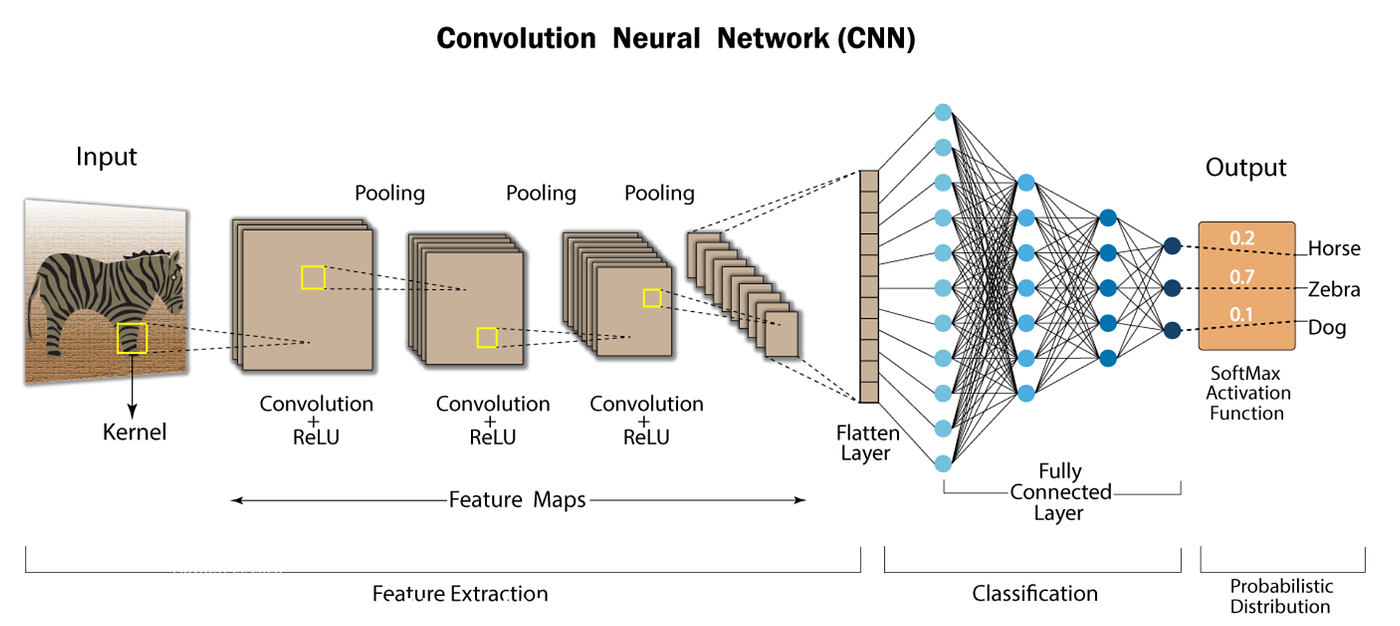

## Importing Necessary Libraries

In [1]:
#Basic Libraries

import pandas as pd                 # For Data Manipulation and Data Analysis
import numpy as np                  # For Numerical Calculation
import matplotlib.pyplot as plt     # For Data Visualization
%matplotlib inline                  # the matplotlib inline plots will appear directly below the cell in which 
                                    #the plot function was called


import seaborn as sns               # For Data visualization         
import os                           # For File and Directory operation
from warnings import filterwarnings # For avoid warnings
filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras                                             #for building, training, and deploying neural networks.
from tensorflow.keras.preprocessing.image import ImageDataGenerator      # For Preprocessing and Augmentation Images

## Load and Explore Data:

In [3]:
train_dir = r'C:\Users\Dell\Downloads\imarticus learning\Deep learning\DL Project\Train'
validation_dir = r'C:\Users\Dell\Downloads\imarticus learning\Deep learning\DL Project\Validation'
test_dir =r'C:\Users\Dell\Downloads\imarticus learning\Deep learning\DL Project\Test'


## Class Distribution:

In [4]:
# Data preprocessing and augmentation
batch_size = 32  #number of images that will be processed in each batch during training.
image_size = (224, 224)  # Adjust based on your model architecture

# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1.0 / 255)           # normalizing the pixel values to the range [0, 1].
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

#Generating Batches of Images from Directory
#It reads images from the specified directories
#generators allow you to load and preprocess images in batches
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Found 6003 images belonging to 2 classes.


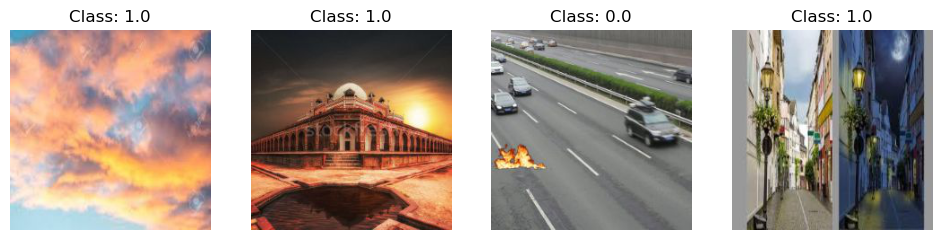

In [5]:
# Load and visualize a few augmented samples from the dataset
# It demonstrates how data augmentation can create variations of the original images for training

sample_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=5,
    class_mode='binary',
    shuffle=True
)

# shuffle=True - ensures that the order of images within each batch is shuffled.

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(sample_generator[0][0][i])
    plt.title(f'Class: {sample_generator[0][1][i]}')        #access a specific class label associated with a particular image
    plt.axis('off')
plt.show()


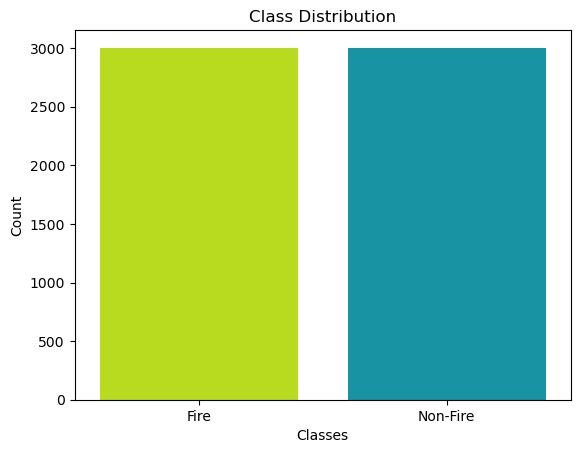

In [6]:
# Visualize class distribution

class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys()) #extracts the class labels as keys from the class_indices 
                                                         #attribute of the train_generator and converts them into a list

sns.countplot(x=class_counts, palette='nipy_spectral_r')
plt.xticks(range(2), class_labels)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

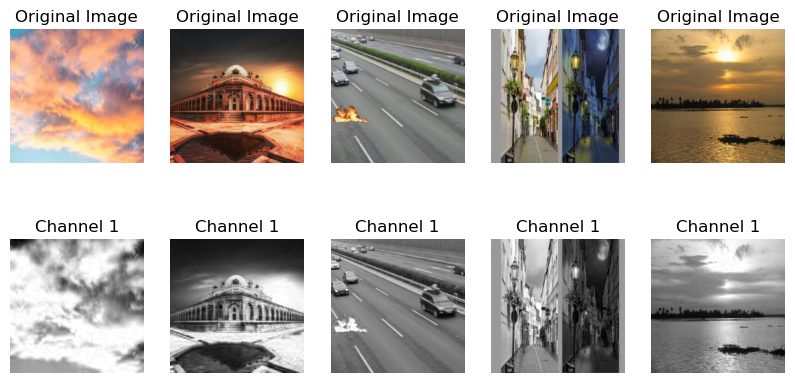

In [7]:
# Visualize image characteristics 

sample_images = sample_generator[0][0]  # Get a batch of sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Original Image')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(sample_images[i][:, :, 0], cmap='gray')     # Indexing operation of a specific channel image from color image 
    plt.title('Channel 1')
    plt.axis('off')
plt.show()

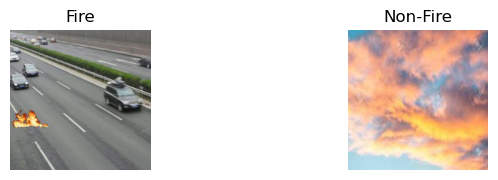

In [8]:
# Visualize the set of fire and Non-fire sample

fire_samples = [sample_generator[0][0][i] for i, label in enumerate(sample_generator[0][1]) if label == 0]
non_fire_samples = [sample_generator[0][0][i] for i, label in enumerate(sample_generator[0][1]) if label == 1]

n = min(len(fire_samples), len(non_fire_samples))  
#the minimum number of samples between fire and non-fire samples.
# so it helps in plotting, only the same number of samples from each class are considered.

plt.figure(figsize=(8, 4))
for i in range(n):
    for j, label in enumerate(['Fire', 'Non-Fire']):
        plt.subplot(2, 2, i + 2+j + 1)
        plt.imshow(fire_samples[i]) if label == 'Fire' else plt.imshow(non_fire_samples[i])
        plt.title(label)
        plt.axis('off')
plt.show()

In [9]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


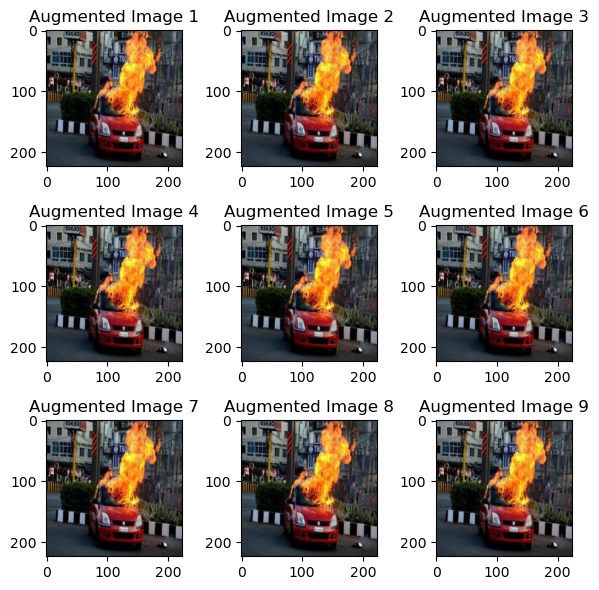

In [10]:
import cv2                   # image processing and manipulation

# to visualize the augmentation of a sample image from a specified class
sample_class = 'fire'                                              # Replace with the desired class (fire or non-fire)
sample_image_path = os.path.join(train_dir, sample_class, os.listdir(os.path.join(train_dir, sample_class))[0])


# Load and preprocess the sample image
sample_image = cv2.imread(sample_image_path)                       # Read the image
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)       # Covert into the RGB format
sample_image = cv2.resize(sample_image, (224, 224))                # Adjust size to match your model input size


# Create a grid of augmented images
augmented_images_grid = []
for i in range(9):  # Create 9 augmented images for visualization
    augmented_image = train_datagen.random_transform(sample_image)
    augmented_images_grid.append(augmented_image)

# Plot the original and augmented images
plt.figure(figsize=(6, 6))
plt.subplot(3,3,1)
plt.imshow(sample_image)
plt.title('Original Image')
for i, augmented_image in enumerate(augmented_images_grid, start=2):
    plt.subplot(3,3, i-1)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i-1}')

plt.tight_layout()                                   # Subplots are properly arranged and spaced in the figure.
plt.show()


## Building CNN model

In [11]:
from tensorflow.keras import layers                           #pre-defined layers to construct neural networks with ease
from tensorflow.keras import models                           #Pre-defined model to use more efficiently
from tensorflow.keras import regularizers                     # For preventing Overfitting

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(512, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))

model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [14]:
from tensorflow.keras import optimizers

#initiates the compilation of the neural network model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [15]:
# initiates the training process for the model

history = model.fit_generator(
      train_generator,           # provides batches of training data to the model       
      steps_per_epoch=100,       # batch size is 20, 2000 images in train, 2000/20 =100 will be steps per epoch
      epochs=20,                 
      validation_data=validation_generator,
      validation_steps=50,       #number of batches from the validation generator per epoch
      verbose=1)

Epoch 1/20
100/100 [==============================] - 123s 1s/step - loss: 6.2507 - acc: 0.6356 - val_loss: 5.2086 - val_acc: 0.4731
Epoch 2/20
100/100 [==============================] - 122s 1s/step - loss: 4.0536 - acc: 0.7400 - val_loss: 3.2663 - val_acc: 0.6725
Epoch 3/20
100/100 [==============================] - 138s 1s/step - loss: 2.5188 - acc: 0.7807 - val_loss: 2.0047 - val_acc: 0.7606
Epoch 4/20
100/100 [==============================] - 156s 2s/step - loss: 1.5314 - acc: 0.7954 - val_loss: 1.2379 - val_acc: 0.7550
Epoch 5/20
100/100 [==============================] - 163s 2s/step - loss: 0.9250 - acc: 0.8197 - val_loss: 0.8412 - val_acc: 0.7544
Epoch 6/20
100/100 [==============================] - 153s 2s/step - loss: 0.6149 - acc: 0.8397 - val_loss: 0.5664 - val_acc: 0.7987
Epoch 7/20
100/100 [==============================] - 153s 2s/step - loss: 0.4487 - acc: 0.8522 - val_loss: 0.4598 - val_acc: 0.8087
Epoch 8/20
100/100 [==============================] - 153s 2s/step - 

## Plot

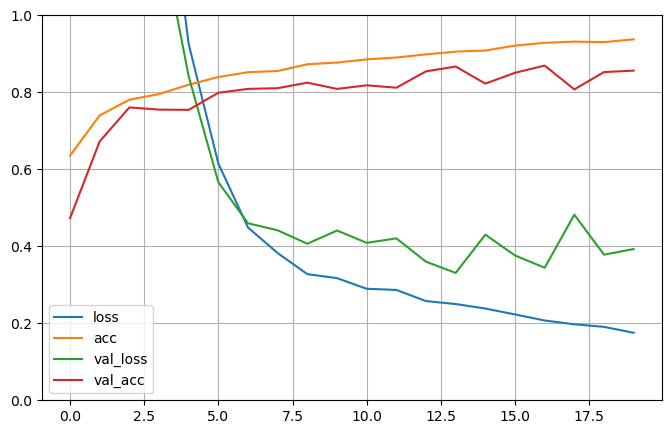

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluation on Test data

In [17]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test accuracy: {test_acc}')

Found 2000 images belonging to 2 classes.
63/63 [==============================] - 28s 441ms/step - loss: 0.4423 - acc: 0.8305
Test accuracy: 0.8305000066757202


### Confusion Matrix

In [18]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))

# Convert predicted probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions).astype(int)

# Get true labels from the test generator
true_labels = test_generator.classes

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
from sklearn.metrics import classification_report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)

print("Classification Report:")
print(class_report)


63/63 [==============================] - 25s 388ms/step
Confusion Matrix:
[[595 405]
 [594 406]]
Classification Report:
              precision    recall  f1-score   support

        Fire       0.50      0.59      0.54      1000
    Non-Fire       0.50      0.41      0.45      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



The balanced accuracy and F1-scores for both classes are around 0.54, indicating a relatively low overall performance. The precision and recall scores are also moderate. This suggests that the model might struggle with distinguishing between "Fire" and "Non-Fire" instances in the given dataset. Further analysis, **hyperparameter tuning**, and possibly additional data may be needed to improve the model's performance.

### 1. Fine-Tuning the Model Architecture:

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [20]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=num_epochs,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=50
)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
print("********************************************************************")
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test accuracy: {test_acc}')

Epoch 1/20
100/100 [==============================] - 790s 8s/step - loss: 0.8815 - accuracy: 0.6447 - val_loss: 0.5830 - val_accuracy: 0.8125
Epoch 2/20
100/100 [==============================] - 824s 8s/step - loss: 0.5309 - accuracy: 0.7475 - val_loss: 0.5855 - val_accuracy: 0.6781
Epoch 3/20
100/100 [==============================] - 756s 8s/step - loss: 0.4699 - accuracy: 0.7848 - val_loss: 0.4225 - val_accuracy: 0.8062
Epoch 4/20
100/100 [==============================] - 725s 7s/step - loss: 0.3889 - accuracy: 0.8291 - val_loss: 0.4287 - val_accuracy: 0.7812
Epoch 5/20
100/100 [==============================] - 747s 7s/step - loss: 0.3686 - accuracy: 0.8381 - val_loss: 0.5168 - val_accuracy: 0.7638
Epoch 6/20
100/100 [==============================] - 739s 7s/step - loss: 0.3192 - accuracy: 0.8644 - val_loss: 0.4506 - val_accuracy: 0.8025
Epoch 7/20
100/100 [==============================] - 723s 7s/step - loss: 0.2578 - accuracy: 0.8978 - val_loss: 0.2974 - val_accuracy: 0.8869

In [21]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = np.round(predictions).astype(int)
true_labels = test_generator.classes

print("********************************************************************")
# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

63/63 [==============================] - 72s 1s/step
********************************************************************
Confusion Matrix:
[[841 159]
 [132 868]]
Classification Report:
              precision    recall  f1-score   support

        Fire       0.86      0.84      0.85      1000
    Non-Fire       0.85      0.87      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000






#### Key Improvements:
- The modified model architecture, along with the use of the Adam optimizer and the appropriate learning rate, has led to a much better-performing model. 
- The confusion matrix and classification report show that the model is now able to correctly classify "Fire" and "Non-Fire" instances with high accuracy and minimal confusion. 
- This model is likely to be more reliable for real-world deployment in classifying fire and non-fire instances in the given dataset

## Data Augmentation:

Data augmentation is a technique used to artificially increase the size of your training dataset by applying various random transformations to the images, such as rotation, shifting, flipping, zooming, and adjusting brightness and contrast. This helps improve the model's robustness and generalization.

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,           # Rescales the pixel values to a range of [0, 1]
    rotation_range=30,           #Randomly rotates images by a specified degree range (here, 30 degrees)
    width_shift_range=0.2,       #Randomly shifts the width of the image by a fraction of the total width (here, 20%)
    height_shift_range=0.2,      # Randomly shifts the height of the image by a fraction of the total height (here, 20%)
    shear_range=0.2,             #Applies shear transformation by a fraction of the width (here, 20%)
    zoom_range=0.2,              #Randomly zooms into the image by a specified range 
    horizontal_flip=True,        #Randomly flips images horizontally
    fill_mode='nearest'          #used for filling in newly created pixels during shifts or rotations

)

In [23]:
num_epochs = 20
# Train the model using augmented data
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=50
)
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
print("********************************************************************")
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test accuracy: {test_acc}')

Epoch 1/20
100/100 [==============================] - 525s 5s/step - loss: 0.0447 - accuracy: 0.9849 - val_loss: 0.4423 - val_accuracy: 0.8938
Epoch 2/20
100/100 [==============================] - 529s 5s/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.4785 - val_accuracy: 0.8838
Epoch 3/20
100/100 [==============================] - 538s 5s/step - loss: 0.0197 - accuracy: 0.9950 - val_loss: 0.6386 - val_accuracy: 0.8794
Epoch 4/20
100/100 [==============================] - 530s 5s/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.6603 - val_accuracy: 0.9000
Epoch 5/20
100/100 [==============================] - 537s 5s/step - loss: 0.0177 - accuracy: 0.9953 - val_loss: 0.5251 - val_accuracy: 0.8925
Epoch 6/20
100/100 [==============================] - 539s 5s/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.7450 - val_accuracy: 0.8531
Epoch 7/20
100/100 [==============================] - 533s 5s/step - loss: 0.0211 - accuracy: 0.9928 - val_loss: 0.4705 - val_accuracy: 0.8994

In [24]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = np.round(predictions).astype(int)
true_labels = test_generator.classes

print("********************************************************************")
# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

63/63 [==============================] - 76s 1s/step
********************************************************************
Confusion Matrix:
[[710 290]
 [226 774]]
Classification Report:
              precision    recall  f1-score   support

        Fire       0.76      0.71      0.73      1000
    Non-Fire       0.73      0.77      0.75      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



- The model's accuracy on the test set is  74.19%, which indicates that it performs not well on previously unseen data.
- Both classes ("Fire" and "Non-Fire") have not so good precision, recall, and F1-score values, suggesting that the model's performance is not so good.



# Exploring Advanced Architectures:

Experiment with pre-trained models VGG16  = Visual Geometry Group-16

### VGG16

In [25]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))    #include_top=False is used in order to exclude the model's fully-connected layers
for layer in base_model.layers:
    layer.trainable = False             #it freezes the weights of all layers in the VGG16 base model, 
                                        # preventing them from being updated during subsequent training

58889256/58889256 [==============================] - 11s 0us/step


In [26]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27560769 (105.14 MB)
Trainable params: 12846081 (49.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model
num_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=50
)

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)
print("********************************************************************")
test_loss, test_acc = model.evaluate(test_generator, steps=50)

print(f'Test accuracy: {test_acc}')

Epoch 1/20
100/100 [==============================] - 1135s 11s/step - loss: 0.5894 - accuracy: 0.8224 - val_loss: 0.1976 - val_accuracy: 0.9187
Epoch 2/20
100/100 [==============================] - 1136s 11s/step - loss: 0.2247 - accuracy: 0.9084 - val_loss: 0.1961 - val_accuracy: 0.9206
Epoch 3/20
100/100 [==============================] - 1128s 11s/step - loss: 0.1808 - accuracy: 0.9234 - val_loss: 0.2559 - val_accuracy: 0.8925
Epoch 4/20
100/100 [==============================] - 1140s 11s/step - loss: 0.1639 - accuracy: 0.9400 - val_loss: 0.2200 - val_accuracy: 0.9087
Epoch 5/20
100/100 [==============================] - 1160s 12s/step - loss: 0.1307 - accuracy: 0.9476 - val_loss: 0.1938 - val_accuracy: 0.9125
Epoch 6/20
100/100 [==============================] - 3676s 37s/step - loss: 0.1215 - accuracy: 0.9501 - val_loss: 0.1920 - val_accuracy: 0.9194
Epoch 7/20
100/100 [==============================] - 1083s 11s/step - loss: 0.1152 - accuracy: 0.9551 - val_loss: 0.1936 - val_ac

In [29]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = np.round(predictions).astype(int)
true_labels = test_generator.classes


63/63 [==============================] - 455s 7s/step


In [30]:
# Plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 800x600 with 0 Axes>

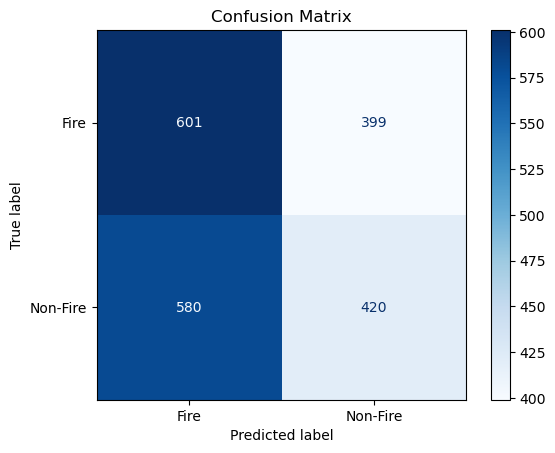

Classification Report:
              precision    recall  f1-score   support

        Fire       0.51      0.60      0.55      1000
    Non-Fire       0.51      0.42      0.46      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

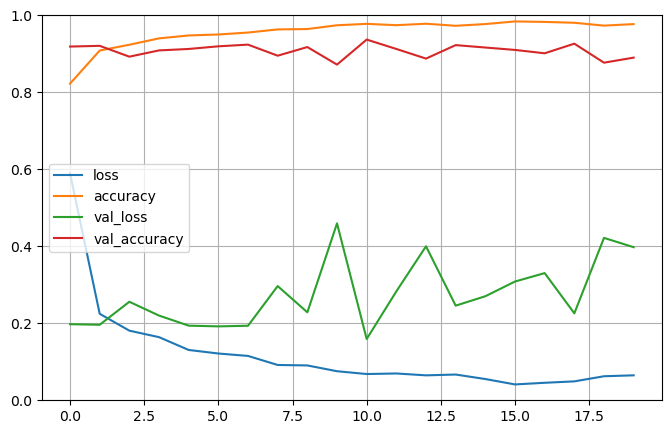

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- The test accuracy of approximately 92.87% suggests that the model is performing reasonably well on the test dataset.
- However, the precision, recall, and F1-score values for both classes ("Fire" and "Non-Fire") are quite low, around 0.51. This indicates that the model is struggling to correctly classify instances, and its performance is not satisfactory.


- In conclusion, the model trained using the VGG-16 architecture does not seem to perform well on the given task.
- So Fine tunning is final model for our dataset, where test accuracy is 85.44 %.




